# Importing Libraries

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

# Loading & Preparing Dataset

In [19]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [20]:
# Deleting The StudentID Colum
df = df.drop('StudentID', axis=1)

In [21]:
# Rounding Up The Decimal In Colum StudyTimeWeekly & GPA
df['StudyTimeWeekly'] = df['StudyTimeWeekly'].round(0)
df['GPA'] = df['GPA'].round(2)

In [22]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,20.0,7,1,2,0,0,1,0,2.93,2.0
1,18,0,0,1,15.0,0,0,1,0,0,0,0,3.04,1.0
2,15,0,2,3,4.0,26,0,2,0,0,0,0,0.11,4.0
3,17,1,0,3,10.0,14,0,3,1,0,0,0,2.05,3.0
4,17,1,0,2,5.0,17,1,3,0,0,0,0,1.29,4.0


# Using Linear Regression

In [23]:
# Spliting Data
X = df.drop('GPA', axis=1)
y = df['GPA']

# Using Sklearn To Shuffle Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Applying Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print(model.score(X_test, y_test))

0.9565629677046004


Using Linear Regression We Got 95% Accuracy

# Using ANN

In [47]:
def ANN():
  model = Sequential()
  model.add(Dense(8, input_dim=13, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [48]:
ANN = ANN()
print(ANN.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 112       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
# Training The Model Also Using EarlyStopping
ANN.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
192/192 [==============================] - 1s 5ms/step - loss: 0.0658
Epoch 2/100
192/192 [==============================] - 1s 6ms/step - loss: 0.0635
Epoch 3/100
192/192 [==============================] - 1s 6ms/step - loss: 0.0626
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 0.0624
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 8/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 9/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 10/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 11/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 12/100
192/192 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 13/100


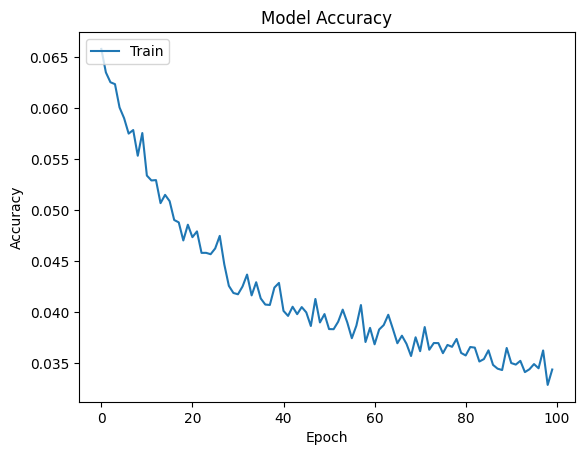

In [56]:
#Ploting Model Accuracy
pyplot.plot(ANN.history.history['loss'])
pyplot.title('Model Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train'], loc='upper left')
pyplot.show()

In [59]:
# Set a tolerance level (e.g., within 10% of the true value)
tolerance = 0.10

# Calculate the number of predictions within the tolerance
within_tolerance = np.sum(np.abs(y_pred - y_test) <= tolerance * y_test)

# Calculate the percentage
percentage_within_tolerance = (within_tolerance / len(y_test)) * 100

print("Percentage of predictions within tolerance:", percentage_within_tolerance)

Percentage of predictions within tolerance: 64.92693110647181


# Conclusion This Task Is Better Suited For Regression